In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Q7.Using numpy functions, transpose and multiply the following arrays
#a=np.arange(4).reshape(2,2)
#b=np.arange(6).reshape(3,2) 

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
print(a.transpose())
print(b.transpose())
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
#a_new=a.flatten()
#a_new
#b
#mul = b*np.transpose(np.array([a_new,]*1)
b*np.expand_dims(a,1)

In [ ]:
#8.Write a Python program to create an array of 5 integers and display the array items in reverse order
import numpy as np
arr=np.array([1,2,3,4])
arr
arr1=list(reversed(arr))
arr1

In [ ]:
#Q9.What was the average grade for all students in the final exam vs both midterms
import openpyxl
import pprint
#wb=openpyxl.load_workbook("Exam Stress Final.xlsx")
file= pd.read_excel("Exam Stress Final.xlsx",sheet_name='Grades')
file
#sheet= wb.get_sheet_by_name('Grades')
print(file['final'].mean())
print(file['Midterm 1'].mean())
print(file['Midterm 2'].mean())

In [ ]:
#Q10.Which students basal body temperature was highest during the second part of the exam?
file= pd.read_excel("Exam Stress Final.xlsx",sheet_name='Temp')
file
file_mid2= file.query('Exam=="Midterm 2"')
file_mid2
file['TEMP'].idxmax()

#file.set_index('Student_id',inplace=True)
#result=file.loc['921']
#result


In [3]:
#Q.33 Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows

# read and show the dataset
df_exam = pd.read_excel('Combined_Exam_Stress_Final.xlsx')
df_exam

,Unnamed: 0,Student_id,Midterm 1,Midterm 2,final,DOB,First Name,Last Name,Gender,Race,EDA,Time in mins,Exam,HR,TEMP,IBI
0,0,S01,78.0,82.0,182.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,S02,82.0,85.0,180.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,S03,77.0,90.0,188.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,S04,75.0,77.0,149.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,S05,67.0,77.0,157.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25452,25452,S010,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,159.0,midterm 2,NaN,NaN,0.463
25453,25453,S010,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,160.0,midterm 2,NaN,NaN,0.391
25454,25454,S010,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,170.0,midterm 2,NaN,NaN,0.393
25455,25455,S010,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,171.0,midterm 2,NaN,NaN,0.566


In [4]:

df_pivot=pd.pivot_table(df_exam, values = ['EDA', 'HR', 'TEMP'], columns = 'Student_id')

df_pivot

Student_id,S01,S010,S02,S03,S04,S05,S06,S07,S08,S09
EDA,0.161171,0.149369,0.111534,0.272532,0.464468,0.370783,0.256905,0.208034,0.393437,0.299416
HR,106.522138,106.231091,114.313813,103.283502,98.399456,104.806015,104.793488,103.842102,105.475896,98.802752
TEMP,26.475624,26.187834,28.224066,26.899314,26.826271,28.553185,27.228459,25.569712,28.464253,28.453486


In [5]:
#Q35. Create a Bins of Grades to segregate the students in Grades  'A','B',C'

df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Grades')

# Average grade percentage
df['Addition'] = df['Midterm 1']+ df['Midterm 2'] + df['final']
df['Result Average Percentage'] = df['Addition']*100/400

#Define bins for Average grade % - for 0 to 55 grade 'C', 55 to 80 grade 'B',  greater than 80, grade 'A'

Bins = (0, 55, 80, 100)

#names for bin names

Grade_Names = ['C', 'B', 'A']


df['Grades'] = pd.cut(df['Result Average Percentage'], Bins, labels = Grade_Names)

df

,Student_id,Midterm 1,Midterm 2,final,Addition,Result Average Percentage,Grades
0,S01,78,82,182,342,85.50,A
1,S02,82,85,180,347,86.75,A
2,S03,77,90,188,355,88.75,A
3,S04,75,77,149,301,75.25,B
4,S05,67,77,157,301,75.25,B
5,S06,71,64,175,310,77.50,B
6,S07,64,33,110,207,51.75,C
7,S08,92,88,184,364,91.00,A
8,S09,80,39,126,245,61.25,B
9,S10,89,64,116,269,67.25,B


In [6]:
#Q36. Create a Word Cloud with First name of Student Names based on thier Race 

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

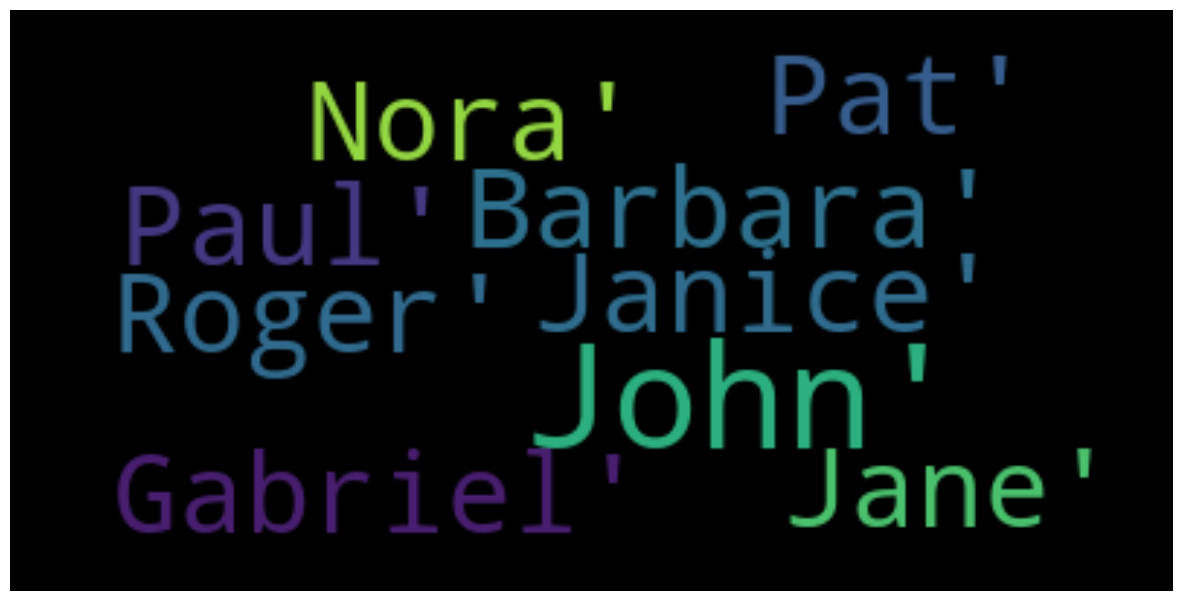

In [7]:
#Q36. Create a Word Cloud with First name of Student Names based on thier Race 

df = pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Demography')

# Unify text from First Name column
text = df['First Name'].values 

# size of word cloud
plt.rcParams["figure.figsize"] = (15,10)

wordcloud = WordCloud(max_font_size = 50).generate(str(text))

#plot word cloud

plt.plot()

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [8]:
#Q38 Write a Python program to get the number of occurrences of a specified element in the array.

from array import *
array_num = array('i', [1, 2, 4, 4, 5, 0, 4, 6, 1, 4, 3, 44, 4])
print("Original array: "+ str(array_num))
print("Number of occurences of the number 4 in said array: "+str(array_num.count(4)))

Original array: array('i', [1, 2, 4, 4, 5, 0, 4, 6, 1, 4, 3, 44, 4])
Number of occurences of the number 4 in said array: 5


In [9]:
#Q.39 Create a 3D list using nested for loops.

def create_3d_list(x, y, z):
    Arr = [5]
    for i in range(x):
        Arr_2d = [1]
        for j in range(y):
            Arr_1d = [0]
            for k in range(z):
                Arr_1d.append('[1,2]')
            Arr_2d.append(Arr_1d)
        Arr.append(Arr_2d)
    return Arr
 
#input
x = 3
y = 3
z = 3
    
    
ThreeD_arr = create_3d_list(x, y, z)

ThreeD_arr

[5,
 [1,
  [0, '[1,2]', '[1,2]', '[1,2]'],
  [0, '[1,2]', '[1,2]', '[1,2]'],
  [0, '[1,2]', '[1,2]', '[1,2]']],
 [1,
  [0, '[1,2]', '[1,2]', '[1,2]'],
  [0, '[1,2]', '[1,2]', '[1,2]'],
  [0, '[1,2]', '[1,2]', '[1,2]']],
 [1,
  [0, '[1,2]', '[1,2]', '[1,2]'],
  [0, '[1,2]', '[1,2]', '[1,2]'],
  [0, '[1,2]', '[1,2]', '[1,2]']]]

In [10]:
#Q.40 #Display each row of this array as a separate slice

Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print(Array[0])
print(Array[1])
print(Array[2])

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


In [11]:
#Q.44 Create a Box  plot for HR and Temp

df1= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'HR')
df2= pd.read_excel("Exam Stress Final.xlsx", sheet_name = 'Temp')


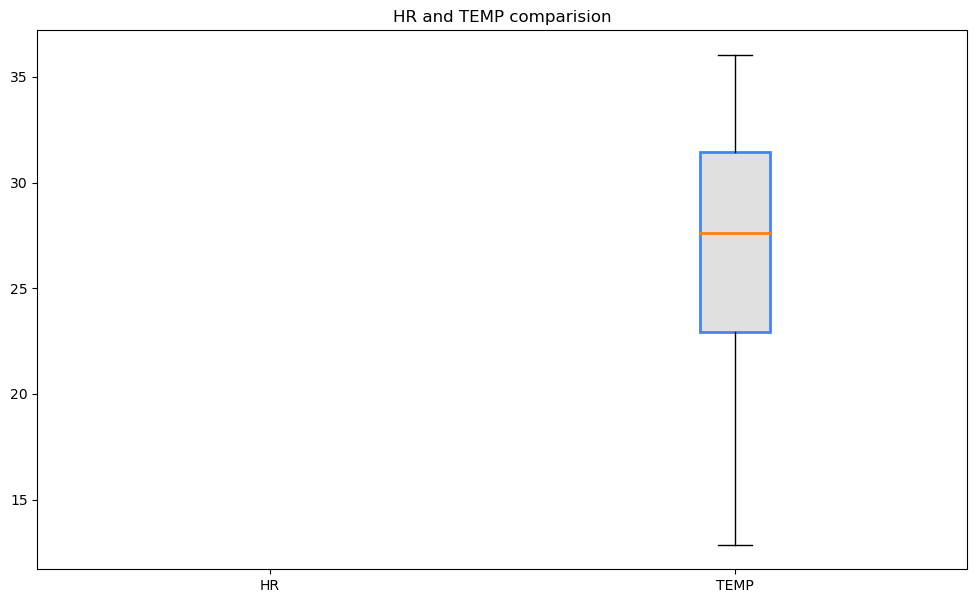

In [12]:
plt.style.use('default')

plt.figure(figsize = (12,7))

labels = ['HR', 'TEMP']

boxes = plt.boxplot([df1.HR, df2.TEMP], labels = labels, patch_artist=True, medianprops ={'linewidth':2})

#set edge color
for box in boxes['boxes']:
    box.set(color='#4286f4', linewidth =2)
    
#Change fill color   

box.set(facecolor='#e0e0e0')

plt.title('HR and TEMP comparision')
    
plt.show()

In [12]:
#49.[    "Python Hackthaon.",
#    "December 2023.",
#   "Numpy Ninja."  ]
#tokenise the Sentences  and place it in single column

sentences = [
    "Python Hackthaon.",
    "December 2023.",
    "Numpy Ninja."
]
String = []
for i in sentences:
    String.extend(i.split())
df = pd.DataFrame(data={'Column':String})
print(df)

       Column
0      Python
1  Hackthaon.
2    December
3       2023.
4       Numpy
5      Ninja.


In [11]:
#50.Count the Students who are in the Race Group 'White'

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
white = df[df['Race'] == 'White']
x = white['Race'].count()
print("Number of Students who are in Race Group:", x)

Number of Students who are in Race Group: 4


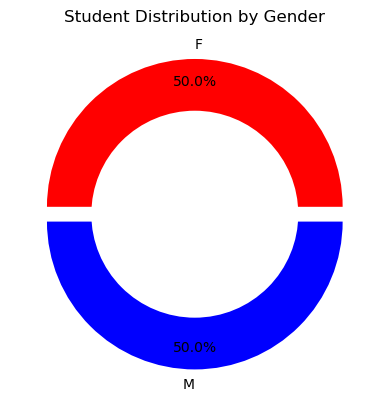

In [9]:
#52.Plot the Donut chart Student distrubution by Gender.

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
gender_counts = df['Gender'].value_counts()

# Set pie chart slices and labels
pie_slices = gender_counts.values
pie_labels = gender_counts.index
colors = ['#FF0000', '#0000FF']
explode = (0.05,0.05)

# Create pie chart
plt.pie(pie_slices, labels=pie_labels,colors=colors, autopct='%1.1f%%', pctdistance=0.85, explode= explode)

# Add title
plt.title('Student Distribution by Gender')

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Add Legends
#plt.legend(labels, loc="upper right")
 
# Display chart
plt.show()

In [8]:
#53.Calculate the 'AGE' of the Student and Display with Student Name 

from datetime import date
df=pd.read_excel("Exam Stress Final.xlsx","Demography")

df["Age"] = (pd.to_datetime('today') - df["DOB"]).dt.days // 365

print("Student Name | Age")

for i, row in df.iterrows():
    print(f"{row['First Name']} {row['Last Name']} | {row['Age']}")

Student Name | Age
Barbara Walters | 14
Nora Jones | 14
Gabriel Willows | 14
John Doe | 14
Jane Doe | 14
Pat Murray | 15
Roger Frederick | 13
John Wills | 14
Paul Cartney | 14
Janice Smith | 14


In [7]:
#54. np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30.

arr=np.arange(1,31).reshape(6,5)
print(arr)
result_arr=np.concatenate((arr[0:1:,3:], arr[-2:6:,3:]),axis=0)
print('Array slicing: \n', result_arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Array slicing: 
 [[ 4  5]
 [24 25]
 [29 30]]


Text(0.5694444444444446, 0.5, 'Count of the Students')

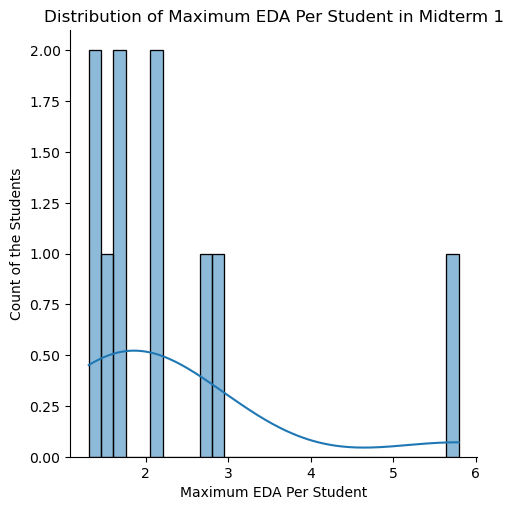

In [6]:
#57.Give Distrubution chart of MAX EDA of the midterm1.

df=pd.read_excel("Exam Stress Final.xlsx","EDA")
midterm1 = df[df['Exam'] == 'midterm 1']
max_eda_per_student = (df.groupby('Student_id')['EDA']).max()
sns.displot(max_eda_per_student, kde=True,bins=30)
plt.title("Distribution of Maximum EDA Per Student in Midterm 1")
plt.xlabel("Maximum EDA Per Student")
plt.ylabel("Count of the Students")

Text(0.5, 1.0, 'Students count based on Genderwise')

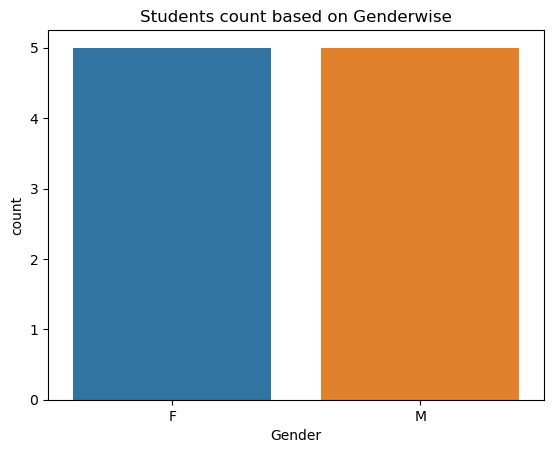

In [5]:
#58.Count the students based on Genderwise using count plot.

df=pd.read_excel("Exam Stress Final.xlsx","Demography")
sns.countplot(data=df,x='Gender')
plt.title("Students count based on Genderwise")

In [3]:
#60.   [ 1,  2,  3,  4,  5],
#      [ 6,  7,  8,  9, 10],
#      [11, 12, 13, 14, 15],
#      [16, 17, 18, 19, 20],
#      [21, 22, 23, 24, 25],
#      [26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20.

arr=np.arange(1,31).reshape(6,5)
result = arr[[0,1, 2, 3], [1, 2, 3, 4]]
print('Array slicing: \n')
for i in result.flat:
    print(i)

Array slicing: 

2
8
14
20


In [3]:
#Q.65 Generate a 3x3  Array using Random values between 1to 9  and Fix the values and position  in Next Run.

arr = np.array([[1,2,3],[7,8,9],[4,5,6]])
print(arr)
my_iter = iter (arr)
print("First Row:",next(my_iter))
print("Second Row:",next(my_iter))
print("Third Row:",next(my_iter))

[[1 2 3]
 [7 8 9]
 [4 5 6]]
First Row: [1 2 3]
Second Row: [7 8 9]
Third Row: [4 5 6]


In [4]:
#Q.66 find the way to reverse string for given input 

str1 = str(input("Enter a Sentence"))
s = str1.split()[::-1]
r= []
for i in s:
    r.append(i)
print(" ".join(r))

Enter a SentenceI Love to Learn Python
Python Learn to Love I


In [7]:
#Q.69 Input any string from user, Convert that into a tuple and then find the lenghth of that tuple

str2 = input("Enter a sentence ")
t = tuple(str2)
#print(t)
length = len (t)
print(length)

Enter a sentence I Love to Learn Python
22


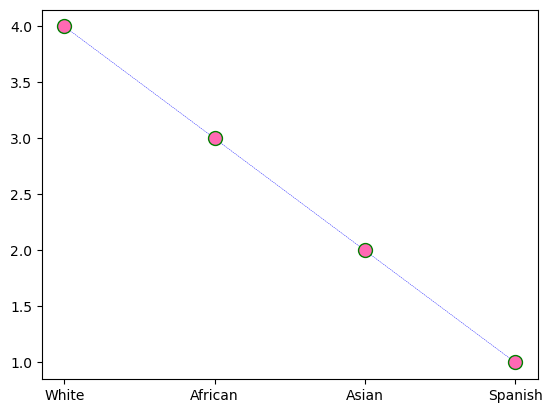

In [13]:
#Q.71 Creat the visualisation to count the student based on race

df1 = pd.read_excel("Exam Stress Final.xlsx","Demography")
df1[["Student_id","Race"]]
count_of_students = df1['Race'].value_counts()
#print(count_of_students)
plt.plot(count_of_students, ls = '--', color = 'b', linewidth = '0.3', marker = 'o', ms = 10, mec = 'g', mfc = 'hotpink')
plt.show()

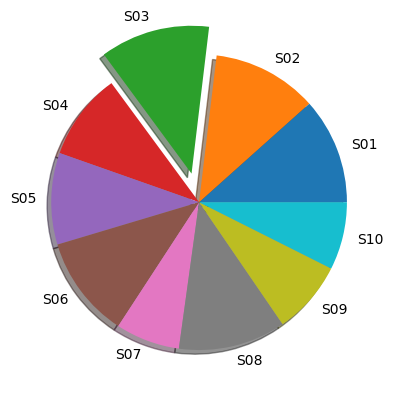

In [14]:
#Q.74 Create a Pie chart for  Grades and explode the wedge with Highest Grade in Final and Label with the Student ID

Grades_df = pd.read_excel("Exam Stress Final.xlsx","Grades")
Grades_df
Final_Grades = Grades_df["final"]
Final_Grades
Student = Grades_df["Student_id"]
#print(Student)
my_labels = Student
my_explode = [0,0,0.2,0,0,0,0,0,0,0]
plt.pie(Final_Grades, labels=my_labels, explode = my_explode, shadow = 'True')
#plt.legend(title = "Analysis of Students with Grades in Final Exam")
plt.show()